# <center> <h1>    🧑 👩 🧔 👩‍🦰 🧑‍💻 👩‍🦰 🧔 👩 🧑 👩 

<center>

# 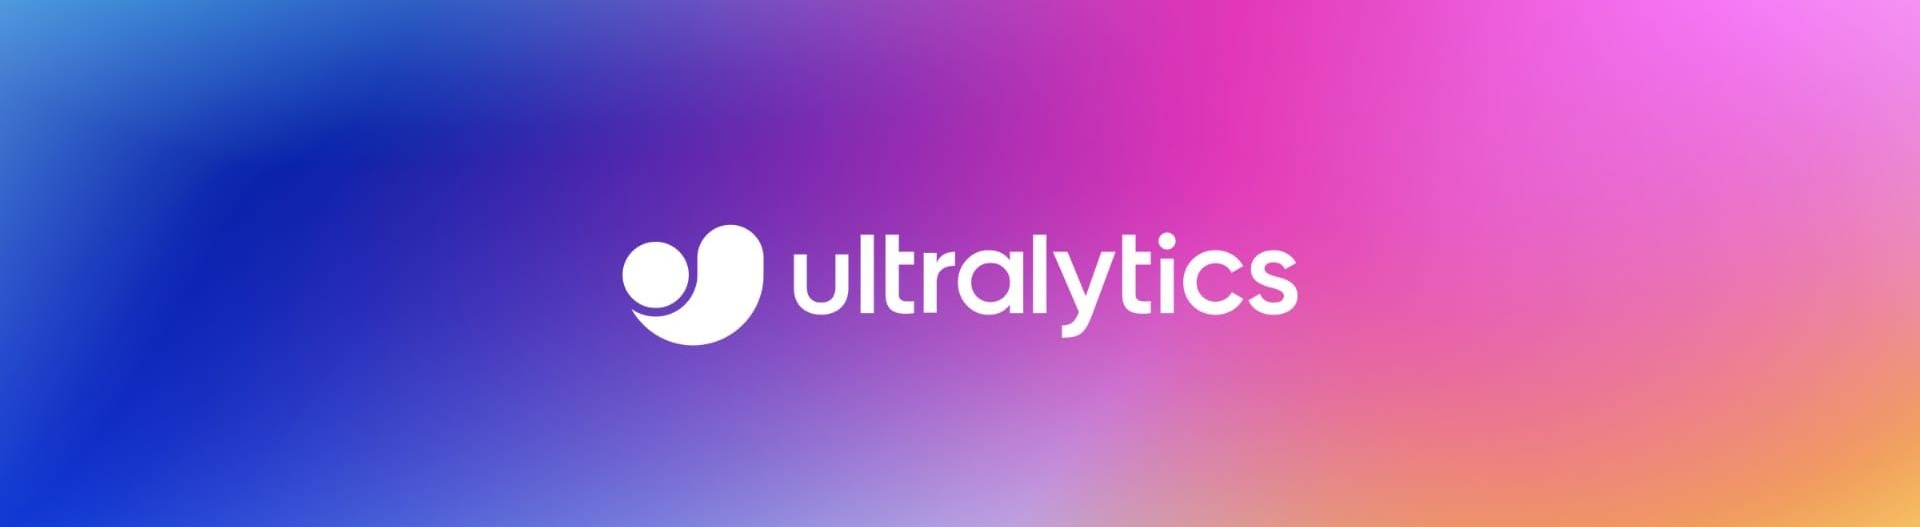

# <center> 1-Usul

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import math

In [10]:
cap = cv2.VideoCapture(0)
cap

< cv2.VideoCapture 0000027AC3E749D0>

In [11]:
# cameramizni o'lchamini to'g'irlab olamiz
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

True

In [12]:
# cameramizni ishlatib ko'ramiz
while True:
    _, frame = cap.read()
    frame = cv2.flip(frame, 1)

    cv2.imshow("camera", frame)
    #print(frame.shape)
    if cv2.waitKey(10) & 0xFF==ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

In [13]:
# modelni yuklab olamiz
model = YOLO("yolov8n.pt")

In [14]:
# YOLO, MS-COCO datasetida o'qitilgan bo'lib u quyidagi classlarni predict qila oladi
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ]

In [16]:
cap = cv2.VideoCapture(0)

# cameramizni olchamini to'g'irlab olamiz
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

while True:
    _, frame = cap.read() # kadrlarni olamiz
    frame = cv2.flip(frame, 1) # bizda video tasvir(kadrlarimiz) teskari ko'rinishda keladi, shu kod orqali biz uni tog'irlab olamiz
    results = model(frame, stream=True) # frame(kadr) ni modelga beramiz. stream=True orqali bashorat uzluksiz oqim ya'ni kadr ekanini bildiramiz

    # bounding box(chegaraviy ramkalar) larni kordinatalarini olamiz
    for r in results:
        boxes = r.boxes

        for box in boxes:
            # bounding box
            x1, y1, x2, y2 = box.xyxy[0] # modelimizdan boxunding box larning qiymatlarini olamiz
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # ularniing qiymatini intga o'takizb olamiz
            
            # bounding boxni chizmiz
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)

            # accuracy(aniqlik)
            accuracy = math.ceil((box.conf[0]*100))/100
            #print(box.conf[0])
            print("Accuracy ---> ",accuracy)

            # qaysi classga tegishliligini olamiz
            cls = int(box.cls[0]) # qaysi classga tegishliligini olamiz son qiymatida
            print("Class nomi --> ", classNames[cls]) # class nomini chiqaramiz

            # class nomini yozamiz
            cv2.putText(frame, classNames[cls] + ": " + str(accuracy), (x1,y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1)

    cv2.imshow('Webcamera', frame) #Kadrlarni ko'rish
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 480x640 1 person, 159.6ms
Accuracy --->  0.86
Class nomi -->  person
Speed: 3.0ms preprocess, 159.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 203.7ms
Accuracy --->  0.87
Class nomi -->  person
Speed: 5.0ms preprocess, 203.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 124.0ms
Accuracy --->  0.88
Class nomi -->  person
Speed: 2.9ms preprocess, 124.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 113.5ms
Accuracy --->  0.91
Class nomi -->  person
Speed: 3.0ms preprocess, 113.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 111.1ms
Accuracy --->  0.91
Class nomi -->  person
Speed: 3.0ms preprocess, 111.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 102.2ms
Accuracy --->  0.9
Class nomi -->  person
Speed: 2.1ms preprocess, 102.2ms inference, 2.0ms postprocess per image a

In [69]:
cap.release()
cv2.destroyAllWindows()

# <center> 2-Usul

In [18]:
# modelni yuklab olamiz
model = YOLO("yolov8s.pt")

In [19]:
resluts = model.predict(source="0", show=True) #source="0" orqali biz web kamerani ishlatishimizni bildiramiz.
print(resluts)
# bu jada ham oson usuli
# siz ultraliytics o'rnatgan paytingizda opencv, matplotlib va shunga o'xshagan kerakli kutubxonalarni ham o'rnatadi
# shuning uchun predict qilish oson, lekin tepadaki 1-Usul ham sizga kerakli bo'lishiga ishonaman. 😁


1/1: 0... Success  (inf frames of shape 640x480 at 30.00 FPS)


WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 480x640 1 person, 255.2ms
0: 480x640 1 person, 319.9ms
0: 480x640 1 person, 239.1ms
0: 480x640 1 person, 242.6ms
0: 480x640 1 person, 254.4ms
0: 480x640 1 person, 241.1ms
0: 480x640 1 person, 341.4ms
0: 480x640 1 person, 250.3ms
0: 480x640 1 person, 245.2ms
0: 480x640 1 person, 232.8ms


KeyboardInterrupt: 

# <center> <h1> 👨‍💻   🚀  